In [1]:
from src.data_reader import DataReader
from src.constant import *
import matplotlib.pyplot as plt
import numpy as np
from src.datasets.dataset import Dataset
from src.models.itemknn.itemknn import ItemKNN
from src.models.cb_iknn.cb_iknn import CBItemKNN
import pandas as pd
from src.evaluation import compute_mrr
import scipy.sparse as sps

In [2]:
dataset = Dataset()

In [3]:
split_dict = dataset.get_split()

In [4]:
train, train_label = split_dict[TRAIN]

In [5]:
val, val_label = split_dict[VAL]

In [19]:
model = CBItemKNN(dataset, topk=200, time_weight=50, t1=0.1, t2=0, shrink=0, normalization=False, c=0.3, l=1)
#model = CBItemKNN(dataset, topk=2000)

In [20]:
full_data = dataset.get_train_sessions()
train_pur = pd.concat([full_data, train_label], axis=0)

In [21]:
model.compute_similarity_matrix(train)

Done: 100%|██████████| 23691/23691 [00:01<00:00, 23284.93it/s]


In [9]:
recs = model.recommend(
    interactions=val,
    remove_seen=True,
    cutoff=100,
    leaderboard=False
)

Using Time Weight on Interaction matrix


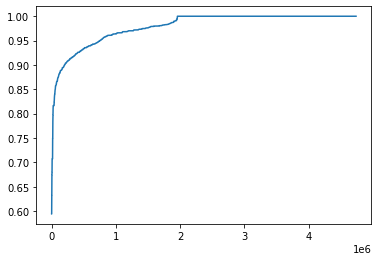

In [18]:
plt.plot(np.arange(len(model.similarity_matrix.data)), sorted(model.similarity_matrix.data))

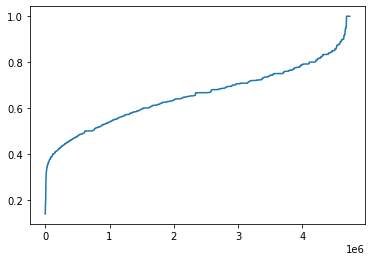

In [22]:
plt.plot(np.arange(len(model.similarity_matrix.data)), sorted(model.similarity_matrix.data))

In [10]:
compute_mrr(recs, val_label)

MRR: 0.005931733401345208


0.005931733401345208